载入配置

In [2]:
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, interpret_model
import pandas as pd
import sys, os

sys.path.append('../')

from src import proj_dir

Use environmental variables in default.yml


载入测试数据

In [11]:
data = pd.read_csv(os.path.join(proj_dir, 'data/local_test/patient_data.csv'))
data.drop('INPATIENT_ID', axis = 1, inplace = True)

numeric_cols = [
    'AGE', 'ISS', 'CAPRINI_SCORE', 'T', 'P', 'R', 'MBP', 'SHOCK_INDEX', 'HEIGHT', 'WEIGHT',
    'BMI', 'RBC', 'HGB', 'PLT', 'WBC', 'ALB', 'CRE', 'UA', 'AST', 'ALT', 'GLU', 'TG', 'CHO',
    'CA', 'MG', 'LDL', 'NA', 'K', 'CL', 'GFR', 'PT', 'FIB', 'DD', 'CK', 'INR'
]

categoric_cols = [p for p in list(data.columns) if p not in ['VTE'] + numeric_cols]

for col in [['VTE'] + categoric_cols]:
        data[col] = data[col].astype(int)

创建分类模型

In [12]:
# numeric_features和categorical_features里不包括target.
task = setup(
    data,
    target = 'VTE',
    numeric_features = numeric_cols,
    categorical_features = categoric_cols,
    verbose = False
)

INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['CHEMOPROPHYLAXIS',
                                                            'SEX', 'SURGERY',
                                                            'CVC', 'ICU_STAY',
                                                            'OPEN_INJURY',
                                                            'INJURY_TYPE',
                                                            'INJURY_CAUSE_fall',
                                                            'INJURY_CAUSE_traffic '
                                                            'accident',
                                                            'INJURY_CAUSE_high '
                                                            'fall',
                                                            'INJURY_

模型比较

In [13]:
# 自动打印各模型各指标对比表.
# 创建模型和训练调参.
# ID          Name
# --------    ----------
# 'lr'        Logistic Regression
# 'knn'       K Nearest Neighbour
# 'nb'        Naive Bayes
# 'dt'        Decision Tree Classifier
# 'svm'       SVM - Linear Kernel
# 'rbfsvm'    SVM - Radial Kernel
# 'gpc'       Gaussian Process Classifier
# 'mlp'       Multi Level Perceptron
# 'ridge'     Ridge Classifier
# 'rf'        Random Forest Classifier
# 'qda'       Quadratic Discriminant Analysis
# 'ada'       Ada Boost Classifier
# 'gbc'       Gradient Boosting Classifier
# 'lda'       Linear Discriminant Analysis
# 'et'        Extra Trees Classifier
# 'xgboost'   Extreme Gradient Boosting
# 'lightgbm'  Light Gradient Boosting
# 'catboost'  CatBoost Classifier
model_store_final = compare_models(
    whitelist = ['lr', 'rf', 'ridge', 'xgboost'],
    sort = 'F1',
    verbose = True
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.7912,0.7424,0.3363,0.5354,0.4002,0.2858,0.3025,0.4509
1,Ridge Classifier,0.7913,0.0000,0.2385,0.5437,0.3268,0.2248,0.2540,0.0231
2,Logistic Regression,0.7897,0.7536,0.1918,0.4617,0.2637,0.1777,0.2029,0.0597
3,Random Forest Classifier,0.7913,0.7008,0.1808,0.5087,0.2556,0.1743,0.2055,0.0477


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=8805, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
INFO:logs:compare_models() succesfully completed......................................


单模型训练

In [14]:
# 创建单个模型.
params = {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10}
clf = create_model('rf', verbose = True, **params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8185,0.1538,0.6667,0.2500,0.1871,0.2543
1,0.7937,0.8292,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7778,0.7862,0.0000,0.0000,0.0000,-0.0304,-0.0648
3,0.8254,0.7523,0.1538,1.0000,0.2667,0.2240,0.3551
4,0.8095,0.8061,0.2143,0.7500,0.3333,0.2603,0.3305
5,0.7619,0.6895,0.0000,0.0000,0.0000,-0.0305,-0.0679
6,0.7619,0.6720,0.0000,0.0000,0.0000,-0.0305,-0.0679
7,0.7619,0.7157,0.0000,0.0000,0.0000,-0.0305,-0.0679
8,0.7903,0.6970,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8065,0.6845,0.0769,1.0000,0.1429,0.1164,0.2486


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=8805, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [15]:
# 模型调参, 使用算法为Stratified Cross Validation.
# TODO: 这里调参时clf中用户设定的参数也发生了改变.
clf_tuned = tune_model(clf, optimize = 'F1', n_iter = 10, fold = 10, round = 4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8138,0.2308,0.6000,0.3333,0.2470,0.2856
1,0.7778,0.8131,0.0000,0.0000,0.0000,-0.0304,-0.0648
2,0.7778,0.7085,0.0769,0.3333,0.1250,0.0516,0.0702
3,0.8254,0.7523,0.1538,1.0000,0.2667,0.2240,0.3551
4,0.8254,0.7792,0.2857,0.8000,0.4211,0.3444,0.4080
5,0.7778,0.8411,0.0714,0.5000,0.1250,0.0735,0.1210
6,0.7778,0.6953,0.0714,0.5000,0.1250,0.0735,0.1210
7,0.8254,0.7310,0.3571,0.7143,0.4762,0.3851,0.4185
8,0.7903,0.6915,0.0769,0.5000,0.1333,0.0820,0.1302
9,0.7581,0.6900,0.2308,0.3750,0.2857,0.1499,0.1563


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8805, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [16]:
# 模型评估.
# 提供了Hyperparameters, AUC, Confusion Matrix, Threshold, PR Curve, Error, Class Report
# Feature Selection, Learning Curve, Manifold Learning, etc., 功能比较强.

# plot_model(clf_tuned, plot = 'auc')
evaluate_model(clf_tuned)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8805, verbose=0,
                       warm_start=False), plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


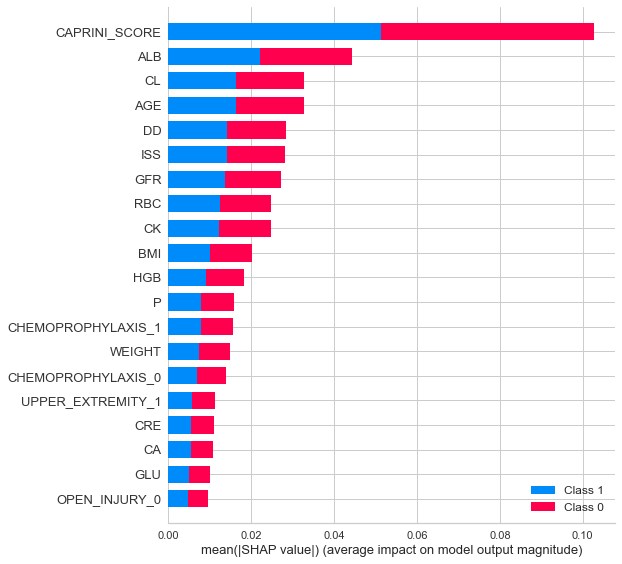

In [17]:
# 模型解释.
# TODO: 偶尔会报错.
interpret_model(clf_tuned)

MLFlow UI

In [ ]:
# TODO: 功能不明.
# !mlflow ui